# EDA of the ERA5 subset - Chicago

This notebook performed EDA analysis of the Chicago wind data

Chicago (The windy city)
Latitude x 5 (42.0 ~ 41.0)
Longitude x 5 (-88.0 ~ -87.0)
Timepoints x 8760 (Year 2023, hourly)
Northwide & Eastwide wind at 10 and 100 meters

## Import and install libraries

In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install xarray

In [ ]:
!pip install ecmwflibs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 MB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for findlibs: filename=findlibs-0.0.5-py3-none-any.whl size=6941 sha256=dbfeff87f012176fac66a036893057b186bae24c698f5e33d5658ba4abcb90b2
  Stored in directory: /root/.cache/pip/wheels/2e/67/14/22fa5b9fd9c41be520b37e908597d6a262803c0fcf2ba7c2c3
Successfully built findlibs


In [ ]:
#! pip install eccodes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eccodes: filename=eccodes-1.7.0-py3-none-any.whl size=41293 sha256=475a4d0c60b4b5fa8367e2de401e91247c2652d4f3ae5a3af87e8016664ef948
  Stored in directory: /root/.cache/pip/wheels/44/16/96/7b9c3092abbd09c79444ba34e07106bc0992eb1c9e05fd58f3
Successfully built eccodes


In [ ]:
!pip install cfgrib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 729.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eccodes: filename=eccodes-1.7.0-py3-none-any.whl size=41293 sha256=eb180056f3160a51ad263029860bac8f045f2849a671dd746143c857a5fd5d9b
  Stored in directory: /root/.cache/pip/wheels/44/16/96/7b9c3092abbd09c79444ba34e07106bc0992eb1c9e05fd58f3
Successfully built eccodes


In [ ]:
import cfgrib

ds = cfgrib.open_datasets('/content/drive/MyDrive/CS 663 - Project/Datasets/ERA5 Chicago/adaptor.mars.internal-1709239921.7896495-18802-1-e188be85-18a5-4050-8a59-fd1fb21ab652.grib')


In [ ]:
ds

[<xarray.Dataset>
 Dimensions:     (time: 731, step: 12, latitude: 5, longitude: 5)
 Coordinates:
     number      int64 0
   * time        (time) datetime64[ns] 2022-12-31T18:00:00 ... 2023-12-31T18:0...
   * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 11:00:00 12:00:00
     surface     float64 0.0
   * latitude    (latitude) float64 42.0 41.75 41.5 41.25 41.0
   * longitude   (longitude) float64 -88.0 -87.75 -87.5 -87.25 -87.0
     valid_time  (time, step) datetime64[ns] 2022-12-31T19:00:00 ... 2024-01-0...
 Data variables:
     fg10        (time, step, latitude, longitude) float32 ...
     i10fg       (time, step, latitude, longitude) float32 ...
 Attributes:
     GRIB_edition:            1
     GRIB_centre:             ecmf
     GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             European Centre for Medium-Range Weather Forecasts,
 <xarray.Dataset>

## EDA Analysis of ERA5 Chicago wind dataset

Xarray dataset

In [ ]:
# Load the dataset
data = ds[1]
data.head()

<xarray.Dataset>
Dimensions:     (time: 5, latitude: 5, longitude: 5)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2023-01-01 ... 2023-01-01T04:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 42.0 41.75 41.5 41.25 41.0
  * longitude   (longitude) float64 -88.0 -87.75 -87.5 -87.25 -87.0
    valid_time  (time) datetime64[ns] 2023-01-01 ... 2023-01-01T04:00:00
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
    t2m         (time, latitude, longitude) float32 ...
    u10n        (time, latitude, longitude) float32 ...
    v10n        (time, latitude, longitude) float32 ...
    u100        (time, latitude, longitude) float32 ...
    v100        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [ ]:
data.info()

xarray.Dataset {
dimensions:
	time = 8760 ;
	latitude = 5 ;
	longitude = 5 ;

variables:
	int64 number() ;
		number:long_name = ensemble member numerical id ;
		number:units = 1 ;
		number:standard_name = realization ;
	datetime64[ns] time(time) ;
		time:long_name = initial time of forecast ;
		time:standard_name = forecast_reference_time ;
	timedelta64[ns] step() ;
		step:long_name = time since forecast_reference_time ;
		step:standard_name = forecast_period ;
	float64 surface() ;
		surface:long_name = original GRIB coordinate for key: level(surface) ;
		surface:units = 1 ;
	float64 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:standard_name = latitude ;
		latitude:long_name = latitude ;
		latitude:stored_direction = decreasing ;
	float64 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:standard_name = longitude ;
		longitude:long_name = longitude ;
	datetime64[ns] valid_time(time) ;
		valid_time:standard_name = time ;
		valid_time:long_name =

In [ ]:
variables = ['u10', 'v10', 'u10n', 'v10n', 'u100', 'v100', 't2m']
data[variables].isnull().sum()

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    number   int64 0
    step     timedelta64[ns] 00:00:00
    surface  float64 0.0
Data variables:
    u10      int64 0
    v10      int64 0
    u10n     int64 0
    v10n     int64 0
    u100     int64 0
    v100     int64 0
    t2m      int64 0

In [ ]:
df = data.to_dataframe()
df.describe()

,number,step,surface,valid_time,u10,v10,t2m,u10n,v10n,u100,v100
count,219000.0,219000,219000.0,219000,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000
mean,0.0,0 days 00:00:00,0.0,2023-07-02 11:30:00,0.622132,0.304051,284.919006,0.640873,0.235569,1.014724,0.679532
min,0.0,0 days 00:00:00,0.0,2023-01-01 00:00:00,-11.985611,-14.091766,251.916321,-12.054337,-14.259735,-16.480255,-16.619354
25%,0.0,0 days 00:00:00,0.0,2023-04-02 05:45:00,-1.573391,-1.978062,276.988670,-1.399429,-1.905609,-2.296780,-2.993984
50%,0.0,0 days 00:00:00,0.0,2023-07-02 11:30:00,0.437477,0.362274,284.541138,0.366241,0.299217,0.819092,0.552773
75%,0.0,0 days 00:00:00,0.0,2023-10-01 17:15:00,2.609581,2.520210,292.892853,2.513081,2.375366,4.390354,4.235416
max,0.0,0 days 00:00:00,0.0,2023-12-31 23:00:00,13.559189,14.158890,309.640869,13.643524,13.811386,17.061813,19.986176
std,0.0,0 days 00:00:00,0.0,NaN,3.086184,3.386751,9.516692,3.039310,3.326887,4.628904,5.040663


In [ ]:
ds = data.rename({'u10': 'East_Wind_10m', 'v10': 'North_Wind_10m', 'u10n': 'East_Neutral_Wind_10m', 'v10n': 'North_Neutral_Wind_10m', 'u100': 'East_Wind_100m', 'v100': 'North_Wind_100m', 't2m': 'Temperature_2m'})

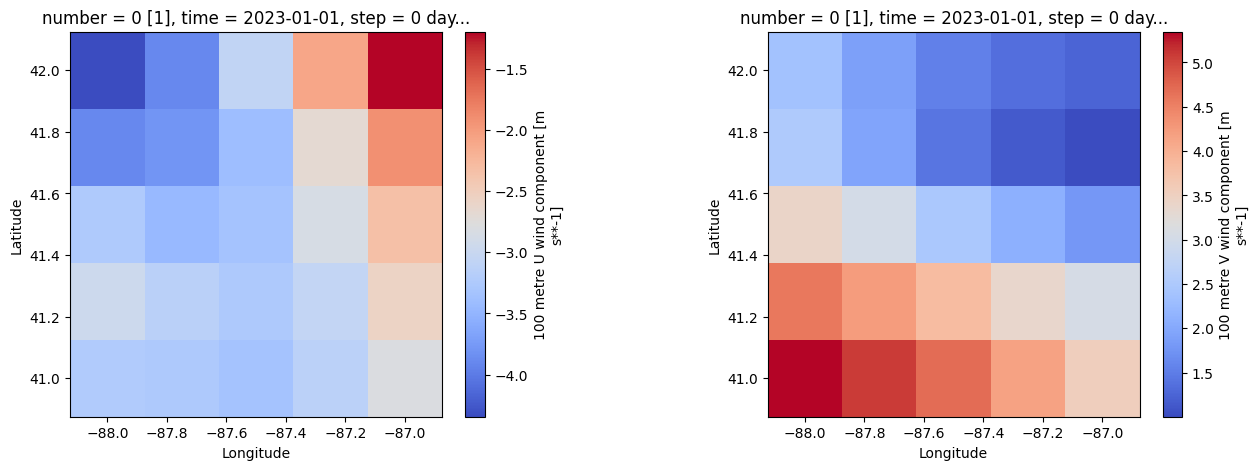

In [ ]:
import matplotlib.pyplot as plt

# Set up a figure with two subplots (vertically arranged)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.5)

# First subplot for Wind_Speed
axs[0].set_title('Eastward Speed', y=10)
# Assuming the first time slice, adjust as necessary
ds.East_Wind_100m[0].plot(ax=axs[0], x='longitude', y='latitude', cmap='coolwarm')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Second subplot for Wind Direction Sine Component
axs[1].set_title('Northward Speed', y=10)
# Adjust for the right component and time slice as necessary
ds.North_Wind_100m[0].plot(ax=axs[1], x='longitude', y='latitude', cmap='coolwarm')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

# Show the plot
plt.show()

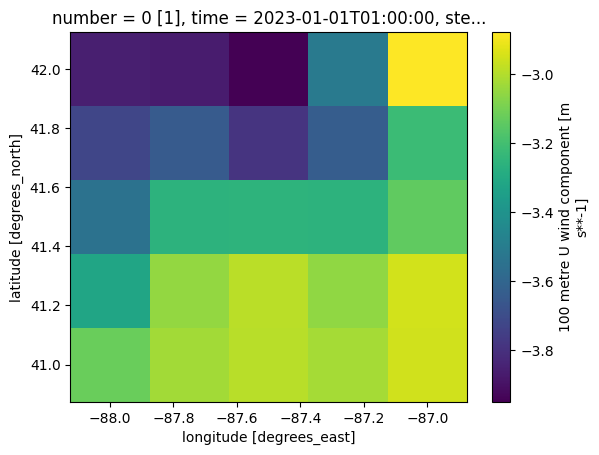

In [ ]:
# Plot for a single time point
# by index
data.u100[1].plot()

In [ ]:
import numpy as np

# Calculate Wind Speed
ds['Wind_Speed_100'] = np.sqrt(ds['North_Wind_100m']**2 + ds['East_Wind_100m']**2)
ds['Wind_Speed_10'] = np.sqrt(ds['North_Wind_10m']**2 + ds['East_Wind_10m']**2)
ds['Neutral_Wind_Speed_10'] = np.sqrt(ds['North_Neutral_Wind_10m']**2 + ds['East_Neutral_Wind_10m']**2)

# Calculate Wind Direction in degrees from the north
ds['Wind_Dir_100'] = np.arctan2(ds.East_Wind_100m, ds.North_Wind_100m) * (180 / np.pi)
ds['Wind_Dir_10'] = np.arctan2(ds.East_Wind_10m, ds.North_Wind_10m) * (180 / np.pi)
ds['Neutral_Wind_Dir_10'] = np.arctan2(ds.East_Neutral_Wind_10m, ds.North_Neutral_Wind_10m) * (180 / np.pi)

# Adjust Wind Direction so that north is 0° and east is 90°
ds['Wind_Dir_100'] = (360 + ds['Wind_Dir_100']) % 360
ds['Wind_Dir_10'] = (360 + ds['Wind_Dir_10']) % 360
ds['Neutral_Wind_Dir_10'] = (360 + ds['Neutral_Wind_Dir_10']) % 360

# Convert wind direction from degrees to radians
wind_dir_rad_100 = np.deg2rad(ds['Wind_Dir_100'])
wind_dir_rad_10 = np.deg2rad(ds['Wind_Dir_10'])
neutral_wind_dir_rad_10 = np.deg2rad(ds['Neutral_Wind_Dir_10'])

# Calculate the sine and cosine components
ds['Wind_Dir_100_Sin'] = np.sin(wind_dir_rad_100)
ds['Wind_Dir_100_Cos'] = np.cos(wind_dir_rad_100)
ds['Wind_Dir_10_Sin'] = np.sin(wind_dir_rad_10)
ds['Wind_Dir_10_Cos'] = np.cos(wind_dir_rad_10)
ds['Neutral_Wind_Dir_10_Sin'] = np.sin(neutral_wind_dir_rad_10)
ds['Neutral_Wind_Dir_10_Cos'] = np.cos(neutral_wind_dir_rad_10)

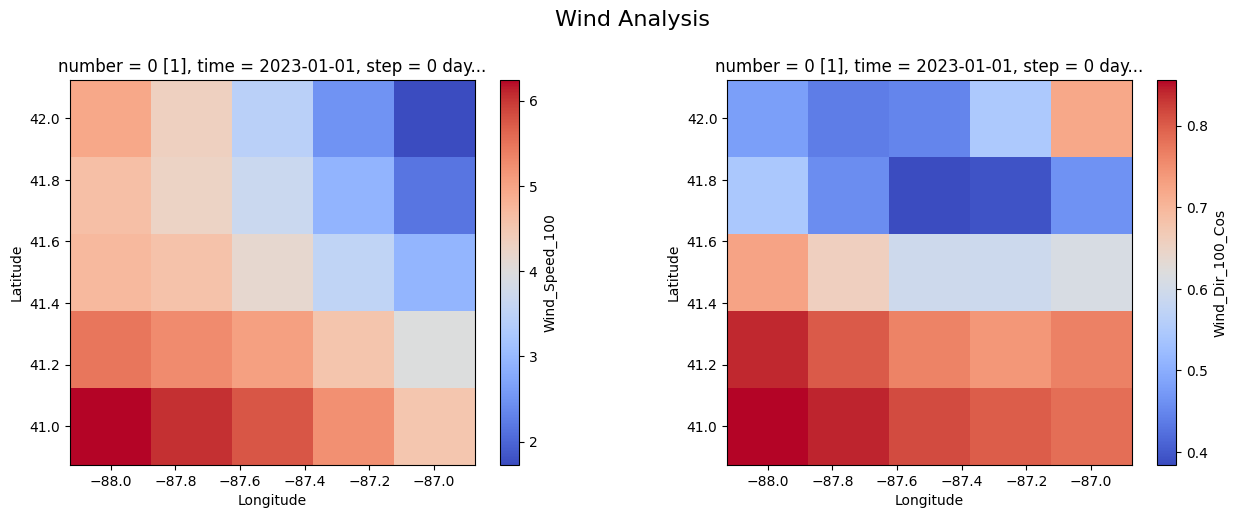

In [ ]:
import matplotlib.pyplot as plt

# Set up a figure with two subplots (vertically arranged)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.3)
fig.suptitle('Wind Analysis', fontsize=16, y=1.02)

axs[0].set_title('Wind Speed')
ds['Wind_Speed_100'][0].plot(ax=axs[0], x='longitude', y='latitude', cmap='coolwarm')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

axs[1].set_title('Wind Direction Sin')
ds['Wind_Dir_100_Cos'][0].plot(ax=axs[1], x='longitude', y='latitude', cmap='coolwarm')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
ds.head()

<xarray.Dataset>
Dimensions:                  (time: 5, latitude: 5, longitude: 5)
Coordinates:
    number                   int64 0
  * time                     (time) datetime64[ns] 2023-01-01 ... 2023-01-01T...
    step                     timedelta64[ns] 00:00:00
    surface                  float64 0.0
  * latitude                 (latitude) float64 42.0 41.75 41.5 41.25 41.0
  * longitude                (longitude) float64 -88.0 -87.75 -87.5 -87.25 -87.0
    valid_time               (time) datetime64[ns] 2023-01-01 ... 2023-01-01T...
Data variables: (12/19)
    East_Wind_10m            (time, latitude, longitude) float32 -2.124 ... -...
    North_Wind_10m           (time, latitude, longitude) float32 0.6402 ... 3...
    Temperature_2m           (time, latitude, longitude) float32 274.6 ... 275.7
    East_Neutral_Wind_10m    (time, latitude, longitude) float32 -1.704 ... -...
    North_Neutral_Wind_10m   (time, latitude, longitude) float32 0.5161 ... 2...
    East_Wind_100m           (time, latitude, longitude) float32 -4.343 ... -...
    ...                       ...
    Wind_Dir_100_Sin         (time, latitude, longitude) float32 -0.8777 ... ...
    Wind_Dir_100_Cos         (time, latitude, longitude) float32 0.4793 ... 0...
    Wind_Dir_10_Sin          (time, latitude, longitude) float32 -0.9575 ... ...
    Wind_Dir_10_Cos          (time, latitude, longitude) float32 0.2886 ... 0...
    Neutral_Wind_Dir_10_Sin  (time, latitude, longitude) float32 -0.9571 ... ...
    Neutral_Wind_Dir_10_Cos  (time, latitude, longitude) float32 0.2899 ... 0...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [ ]:
df = ds.to_dataframe()
df.describe()

,number,step,surface,valid_time,East_Wind_10m,North_Wind_10m,Temperature_2m,East_Neutral_Wind_10m,North_Neutral_Wind_10m,East_Wind_100m,...,Neutral_Wind_Speed_10,Wind_Dir_100,Wind_Dir_10,Neutral_Wind_Dir_10,Wind_Dir_100_Sin,Wind_Dir_100_Cos,Wind_Dir_10_Sin,Wind_Dir_10_Cos,Neutral_Wind_Dir_10_Sin,Neutral_Wind_Dir_10_Cos
count,219000.0,219000,219000.0,219000,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000,...,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000
mean,0.0,0 days 00:00:00,0.0,2023-07-02 11:30:00,0.622132,0.304051,284.919006,0.640873,0.235569,1.014724,...,3.971354,163.107376,165.695328,165.622116,0.100302,0.071941,0.081577,0.069945,0.081910,0.070108
min,0.0,0 days 00:00:00,0.0,2023-01-01 00:00:00,-11.985611,-14.091766,251.916321,-12.054337,-14.259735,-16.480255,...,0.012396,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.0,0 days 00:00:00,0.0,2023-04-02 05:45:00,-1.573391,-1.978062,276.988670,-1.399429,-1.905609,-2.296780,...,2.302272,66.927361,69.279236,69.202232,-0.536479,-0.643339,-0.564168,-0.653803,-0.563122,-0.653740
50%,0.0,0 days 00:00:00,0.0,2023-07-02 11:30:00,0.437477,0.362274,284.541138,0.366241,0.299217,0.819092,...,3.683599,154.733887,160.427948,160.349609,0.173595,0.123565,0.137408,0.123442,0.138192,0.123503
75%,0.0,0 days 00:00:00,0.0,2023-10-01 17:15:00,2.609581,2.520210,292.892853,2.513081,2.375366,4.390354,...,5.292754,254.262314,257.181152,257.124748,0.764707,0.800010,0.746486,0.803411,0.746514,0.803492
max,0.0,0 days 00:00:00,0.0,2023-12-31 23:00:00,13.559189,14.158890,309.640869,13.643524,13.811386,17.061813,...,16.946877,359.999847,359.998138,359.998810,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.0,0 days 00:00:00,0.0,NaN,3.086184,3.386751,9.516692,3.039310,3.326887,4.628904,...,2.236084,107.832787,108.216934,108.219841,0.684787,0.718217,0.684445,0.721105,0.684353,0.721139


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 219000 entries, (Timestamp('2023-01-01 00:00:00'), 42.0, -88.0) to (Timestamp('2023-12-31 23:00:00'), 41.0, -87.0)
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   number                   219000 non-null  int64          
 1   step                     219000 non-null  timedelta64[ns]
 2   surface                  219000 non-null  float64        
 3   valid_time               219000 non-null  datetime64[ns] 
 4   East_Wind_10m            219000 non-null  float32        
 5   North_Wind_10m           219000 non-null  float32        
 6   Temperature_2m           219000 non-null  float32        
 7   East_Neutral_Wind_10m    219000 non-null  float32        
 8   North_Neutral_Wind_10m   219000 non-null  float32        
 9   East_Wind_100m           219000 non-null  float32        
 10  North_Wind_100m          219000 non-null 

In [ ]:
df.to_csv('/content/drive/My Drive/CS 663 - Project/Chicago_Data.csv')

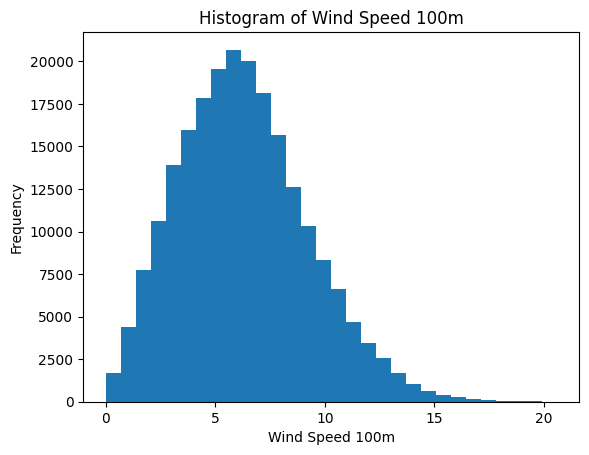

In [ ]:
# Select the DataArray you want to plot
data_array = ds.Wind_Speed_100

# Create a histogram
data_array.plot.hist(bins=30)  # Adjust the number of bins as needed

# Adding labels and title for clarity
plt.xlabel('Wind Speed 100m')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Speed 100m')

# Show the plot
plt.show()

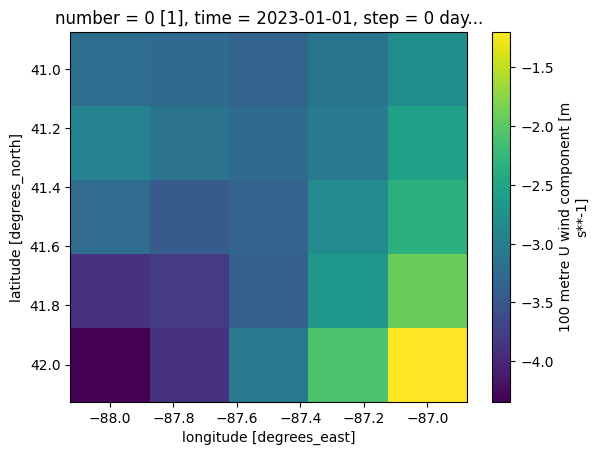

In [ ]:
# Plot for a single time point
# By value
data.u100.sel(time='2023-01-01T00:00:00.000000000').plot(y='latitude', yincrease=False)

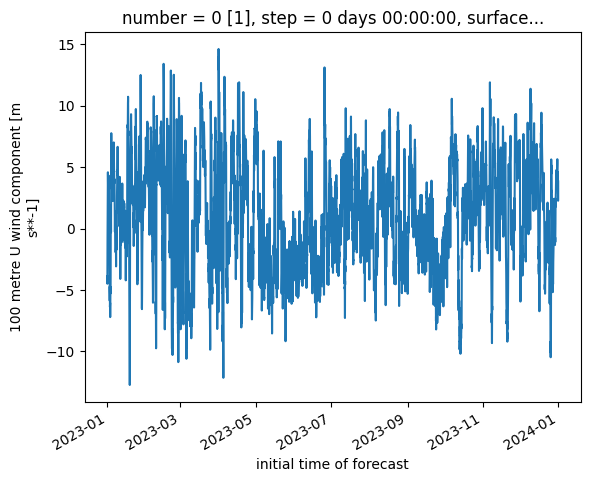

In [ ]:
# Plot for all time point, but a single latitude x longitude
# with index
data.u100[:, 0, 0].plot()

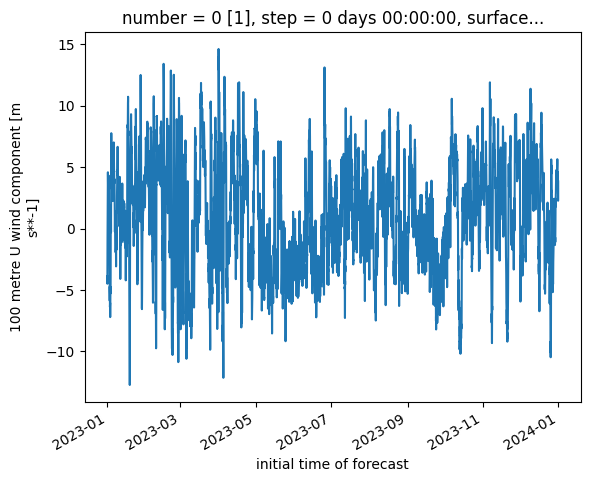

In [ ]:
# Plot for all time point, but a single latitude x longitude
# with values
data.u100.sel(latitude=42, longitude =-88).plot()

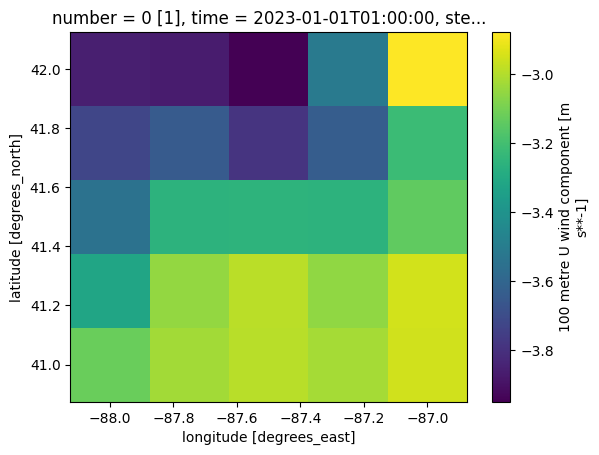

In [ ]:
# Select a certain range of data
sliced = data.sel(time=slice('2023-01-01T00:00:00.000000000', '2023-02-01T00:00:00.000000000'))
sliced.u100[1].plot(x='longitude', y='latitude')

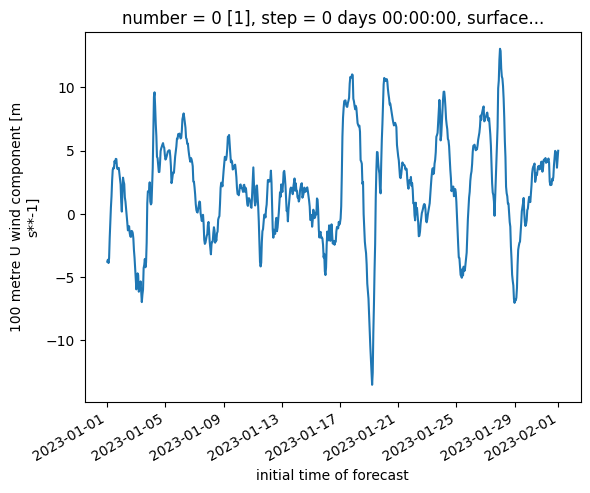

In [ ]:
sliced.u100[:, 1, 1].plot()